# practica final
santiago naranjo sanchez
cc:101726782




#Librerias

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statistics as stat
import numpy as np
import seaborn as sns
from scipy import signal



# Funciones

In [ ]:
def graficas_punto(x,y,xlabel,ylabel,title): # funcion para agregar titulos y cuadrillas a las graficas
  plt.figure(figsize=(20,10))
  plt.plot(x,y,".m")
  plt.grid()
  plt.title(title,fontsize=20)
  plt.xlabel(xlabel,fontsize=20)
  plt.ylabel(ylabel,fontsize=20)

def promedio(vector_x):
  Y = np.zeros(1000)
  for i in vector_x:
    Y =Y + i # Variable auxiliar
  Y=Y/12

    # Gráfica
  plt.subplot(431)
  plt.grid()
  plt.plot(vector_x[0])
  plt.title('Variables Aleatorias Uniformes', fontsize=20, color='w')
  plt.subplot(432)
  plt.grid()
  plt.plot(vector_x[1])
  plt.subplot(433)
  plt.grid()
  plt.plot(vector_x[2])
  plt.subplot(434)
  plt.grid()
  plt.plot(vector_x[3])
  plt.subplot(435)
  plt.grid()
  plt.plot(vector_x[4])
  plt.subplot(436)
  plt.grid()
  plt.plot(vector_x[5])
  plt.subplot(437)
  plt.grid()
  plt.plot(vector_x[6])
  plt.subplot(438)
  plt.grid()
  plt.plot(vector_x[7])
  plt.subplot(439)
  plt.grid()
  plt.plot(vector_x[8])
  plt.subplot(4,3,10)
  plt.grid()
  plt.plot(vector_x[9])
  plt.subplot(4,3,11)
  plt.grid()
  plt.plot(vector_x[10])
  plt.subplot(4,3,12)
  plt.grid()
  plt.plot(vector_x[11])

  plt.figure()
  plt.grid()
  #plt.title("Va  Y", fontsize = 20, color = 'b')
  plt.plot(Y,label='Va Y')
  plt.legend(fontsize=25)


def graficas3(t,y1,y2,y3,dc,n): # funcion para agregar titulos y cuadrillas a las graficas
  plt.figure(figsize=(30,10))

  plt.subplot(3, 1, 2)
  plt.plot(t,y3,'g',label=n)#aqui
  plt.ylabel('Amplitud',fontsize=13)
  plt.xlabel('Tiempo(s)',fontsize=13)
  plt.grid()
  plt.legend(fontsize=23)

  plt.subplot(3, 2, 2)
  plt.plot(t,y1,'r',label='moduladora')
  plt.ylabel('Amplitud',fontsize=13)
  plt.xlabel('Tiempo(s)',fontsize=13)
  plt.grid()
  plt.legend(fontsize=23)

  plt.subplot(3, 2, 1)
  plt.plot(t,y2,label='Portadora')
  plt.ylabel('Amplitud',fontsize=13)
  plt.xlabel('Tiempo(s)',fontsize=13)
  plt.grid()
  plt.legend(fontsize=23)

  plt.figure(figsize=(25,7))
  plt.ylabel('Amplitud',fontsize=13)
  plt.xlabel('Tiempo(s)',fontsize=13)
  plt.grid()
  plt.plot(t,y3,label='P')
  plt.plot(t,y1+dc,label='moduladora')
  plt.legend(fontsize=23)

  if n=='GP':
    plt.plot(t,-(y1+dc),label='moduladora')
    plt.legend(fontsize=23)


def fourier(senal, fm, t, i, lt, fp=0):
  f=np.fft.fftshift(np.fft.fft(senal))
  free=np.fft.fftshift(np.fft.fftfreq(len(senal),d=t[1]-t[0]))
  plt.figure(figsize = (14,4))
  plt.xlabel("Frecuencia")
  plt.ylabel("Amplitud")
  plt.title('Comportamiento Espectral de la '+lt)
  plt.plot(free,(1/len(senal))*abs(f),'b')
  plt.xlim([(-fp-0.3*fm),(fp+0.3*fm)])
  #Cuadricula
  plt.grid()

def adm_espectro(Cn,signal,fm,t,fp=0,limit=4): # señal espectral de Fourier
  f = np.fft.fft(signal)
  f = np.fft.fftshift(f)
  freq = np.fft.fftfreq(len(signal),d = t[1]-t[0])
  freq = np.fft.fftshift(freq)

  if fm == 50e3:
     plt.plot(freq,(1/len(signal)*abs(f)),'r',label='Radio Bio')


  if fm == 100e3:
     plt.plot(freq,(1/len(signal)*abs(f)),'c',label='Radio electronica')

  if fm == 200e3:
     plt.plot(freq,(1/len(signal)*abs(f)),'b',label='Radio Teleco')

  plt.axvline(x = 1.1e6, color = 'r')
  plt.axvline(x = 1.3e6, color = 'r')
  plt.axvline(x = 1.4e6, color = 'g')
  plt.axvline(x = 2.6e6, color = 'g')
  plt.axvline(x = 2.9e6, color = 'b')
  plt.axvline(x = 2.7e6, color = 'b')
  plt.legend(framealpha=1, frameon=True);
  plt.xlim((1e6),(3e6))
  plt.grid()


def demodular(demodulada , fc, t, m):
  b, a = signal.butter(4, fc, fs=20e6)
  senal_filtrada1 = signal.filtfilt(b,a,demodulada)

  plt.figure(figsize=(12,12))

  plt.subplot(3,1,1)
  plt.title("Señal moduladora")
  plt.plot(t, m)
  plt.grid()

  plt.subplot(3,1,2)
  plt.title("Señal demodulada")
  plt.plot(t,demodulada)
  plt.grid()

  plt.subplot(3,1,3)
  plt.title("Señal filtrada")
  plt.plot(t,senal_filtrada1)
  plt.grid()

  plt.show()


# 1) correlacion


De un grupo de 404 vloggers de YouTube, se recolectó la puntuación en uno de los 5 grandes rasgos de personalidad, llamado el rasgo "Agreeableness", el cual, mide si la persona es amigable o si es poco colaborador (no amigable). Analizando las transcripciones del audio de los videos de los vlogs, mediante técnicas de Procesamiento de Lenguaje Natural y haciendo uso de un sistema de regresión, se logra predecir la puntuación del rasgo.


# 1.1
Lea el archivo "Regression_Data.csv" (adjuntado con la guía, archivo csv delimitado por comas) y genere un vector columna para cada uno de los datos en el archivo: un vector para "Real_score" y un vector para "Predicted_score".

In [ ]:
drive.mount('/content/drive')
ruta ='/content/drive/MyDrive/trabajofinalseñales/Regression_Data.csv'
datos = pd.read_csv(ruta)
Real_score_data = datos['Real_score']
Predicted_score_data= datos['Predicted_score']
Real_score=[]
Predicted_score=[]

for i in Real_score_data:
  Real_score.append(float(i))

for i in Predicted_score_data:
 Predicted_score.append(float(i))



#1.2
Realizar una gráfica de Real_Score vs Predicted_score. ¿Según las gráficas obtenidas, se puede inferir el valor al que va tender su correlación? ¿de ser posible, cuál es ese valor?

In [ ]:
graficas_punto(Real_score,Predicted_score,'Real_score','Predicted_score','Real_score VS Predicted_score')

R/ La dispersión de los datos dificulta establecer una correlación clara entre las variables, aunque se puede observar un crecimiento conjunto, lo que sugiere una correlación positiva.

# 1.3
Calcular el coeficiente de correlación de Pearson y de Spearman entre el valor real del rasgo real y el valor del rasgo predicho. ¿Hay una relación lineal entre el valor real y el predicho? ¿El resultado concuerda con lo esperado en el punto anterior?


In [ ]:
pearson=stats.pearsonr(Real_score,Predicted_score)[0]

spearman,P2 = stats.spearmanr(Real_score,Predicted_score)

print('Coeficiente de Pearson =',pearson)
print('Coeficiente de Spearman =',spearman)


A través del resultado obtenido en la correlación  (0.44)  se puede observar que las variables si estan parcialmente correlacionadas, y que efectivamente toman un valor positivo entre 0 y 1 debido a que se logra "ver" un linea creciente en la grafica

# 2)VA


# 2.1
 Genere 12 variables aleatorias exponenciales, independientes e identicamente distribuidas con media μ y varianza 0 < σ 2 < ∞ . Grafique, utilizando la función subplot, cada una de las variables.


In [ ]:
def promedio(vector_x):
    num_variables = len(vector_x)
    Y = np.zeros(1000)
    for i in vector_x:
        Y = Y + i  # Variable auxiliar
    Y = Y / num_variables

    # Calcular el número de filas y columnas de los subplots
    rows = (num_variables - 1) // 3 + 1
    cols = min(num_variables, 3)

    # Configurar la figura y los subplots
    fig, axs = plt.subplots(rows, cols, figsize=(16, 3*rows))
    fig.subplots_adjust(hspace=0.5)

    # Graficar cada variable en un subplot
    for i, ax in enumerate(axs.flatten()):
        if i < num_variables:
            ax.grid()
            ax.plot(vector_x[i])
            ax.set_title(f'Variable {i+1}')

In [ ]:
# Definir el número de variables a graficar
num_variables = 12

# Generar las variables aleatorias
mu = 5.0  # Media
variables = [np.random.exponential(scale=mu, size=(1000,)) for _ in range(num_variables)]

# Llamar a la función promedio
promedio(variables)


#2.2
Genere y grafique una nueva variable Y definida como el promedio de la suma de las variables generadas en el numeral anterior. Estime la fdp (con la función hist), la media y la varianza de Y.

In [ ]:
def promedio2(vector_x):
    num_variables = len(vector_x)
    Y = np.zeros(1000)
    for i in vector_x:
        Y = Y + i  # Variable auxiliar
    Y = Y / num_variables

   # Graficar la variable promedio
    plt.figure()
    plt.grid()
    plt.plot(Y, label='Va Y')
    plt.legend(fontsize=25)
    plt.title("Variable Promedio", fontsize=20)
    #fdp
    plt.figure()
    plt.grid()
    plt.title("Histograma de Y", fontsize = 20, color = 'm')
    plt.hist(Y,label='Pdf Y')
    ##sns.displot(Y, kde=True, color='b')
    plt.legend(fontsize=25)
    plt.show()
    med_Y = stat.mean(Y)
    var_Y = stat.variance(Y)
    desv_Y = (var_Y)**1/2;  # Desviación estandar
    # Crear el DataFrame
    df = pd.DataFrame({'Estadística': ['Media', 'Varianza', 'Desviación estándar'],
                   'Valor': [med_Y, var_Y, desv_Y]})
    # Mostrar las figuras
    plt.show()
    # Imprime los resultados
    print(df)


In [ ]:
promedio2(variables)


# 3) Administración del espectro


Su compañía participó en la subasta del espectro organizada por MinTIC y ha comprado una banda del espectro de la ciudad la cual está comprendida entre los 1MHz y 3MHz (dispone de 2MHz de ancho de banda). Usted deberá gestionar este espectro de manera que puedan funcionar tres emisora:

● Radio electrónica: transmite señales de información cuadradas unipolares con una amplitud de 2V, con un ciclo de dureza del 50% y a una frecuencia de 100kHz.

● Radio teleco: transmite señales de información cuadradas unipolares con una amplitud de 4V, con un ciclo de dureza del 25% y a una frecuencia de 200kHz.

● Radio Bio: transmite señales de información cuadradas bipolares con una amplitud de 3V, con un ciclo de dureza del 50% y a una frecuencia de 50kHz.

Use modulaciones AM para modular cada emisora. Como señal portadora puede usar una señal coseno con amplitud igual a 1, asegúrese de que la frecuencia de cada portadora para cada modulación permita que las tres emisores se encuentren en el espectro separadas por al menos 100kHz para que no se presenten interferencias. Puede calcular el ancho de banda considerando el 90% de la potencia de la señal.

Se recomienda hacer los cálculos en una hoja y reportarlos en el informe mediante una foto o escribiendo las ecuaciones en formato LaTex. Adicionalmente debe graficar para cada modulación la señal moduladora, portadora y la señal modulada. Al final realice un gráfico donde muestre las tres modulaciones en el dominio espectral e indique con algún color el ancho de banda de cada emisora.  

Cree una función en python que permite demodular cualquiera de las emisoras usando como entrada solo una frecuencia entre 1MHz y 3MHz.


In [ ]:


# Frecuencia Moduladora (mensaje a enviar) de cada emisora
fm_electro = 100e3
fm_teleco = 200e3
fm_bio = 50e3

# Periodos de cada señal
Tm_electro = 1 / fm_electro
Tm_teleco = 1 / fm_teleco
Tm_bio = 1 / fm_bio

# Amplitud moduladora en voltios
A_electron = 2
A_teleco = 4
A_bio = 3

nT = 4  # periodos de la señal
dt = 1 / 1000  # paso de tiempo en milésima

# Vector temporal con 6000 elementos igual mente espacioados
t_electro = np.linspace(0, nT, int(nT / dt)) * Tm_electro
t_teleco = np.linspace(0, nT, int(nT / dt)) * Tm_teleco
t_bio = np.linspace(0, nT, int(nT / dt)) * Tm_bio

# Tren de pulsos
mt_electro = 1 + signal.square(2 * np.pi * fm_electro * t_electro, duty=0.5)
mt_teleco = 2 + (A_teleco / 2) * signal.square(2 * np.pi * fm_teleco * t_teleco, duty=0.25)
mt_bio = A_bio * signal.square(2 * np.pi * fm_bio * t_bio, duty=0.5)

# Graficar señal de fm_electro
plt.figure(figsize=(10,5))
plt.plot(t_electro, mt_electro)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal fm_electro')
plt.grid(True)
plt.show()

# Graficar señal de fm_teleco
plt.figure(figsize=(10,5))
plt.plot(t_teleco, mt_teleco)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal fm_teleco')
plt.grid(True)
plt.show()

# Graficar señal de fm_bio
plt.figure(figsize=(10,5))
plt.plot(t_bio, mt_bio)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal fm_bio')
plt.grid(True)
plt.show()


#3.1 Modulacion Gran portadora



In [ ]:
#Electronica
indice=1
amplitudpor=1
mod_GP_electo=mt_electro
t= t_electro
fp=1.2e6
gp="GP"
wp_electro=2*np.pi*fp  #frecuencia de la portadora
por_electro=amplitudpor*np.cos(wp_electro*t)
# Gran portadora
modulGP_electro=(A_electron+mod_GP_electo)*por_electro
graficas3(t,mod_GP_electo,por_electro,modulGP_electro,2,gp)

In [ ]:
#telecomunicaiones
indice=1
amplitudpor=1
mod=mt_teleco
t= t_teleco
fp=2e6
gp="GP"
wp_teleco=2*np.pi*fp
por_teleco=amplitudpor*np.cos(wp_teleco*t)
# Gran portadora
modulGP_teleco=(A_teleco+mod)*por_teleco
graficas3(t,mod,por_teleco,modulGP_teleco,A_teleco,gp)

In [ ]:
#bio
indice=1
amplitudpor=1
mod2=mt_bio
t= t_bio
fp=2.8e6
gp="GP"
wp=2*np.pi*fp
por_bio=amplitudpor*np.cos(wp*t)
# Gran portadora
modulGP_bio=(A_bio+mod2)*por_bio
graficas3(t,mod2,por_bio,modulGP_bio,A_bio,gp)

#3.2 modulacion portadora suprimida

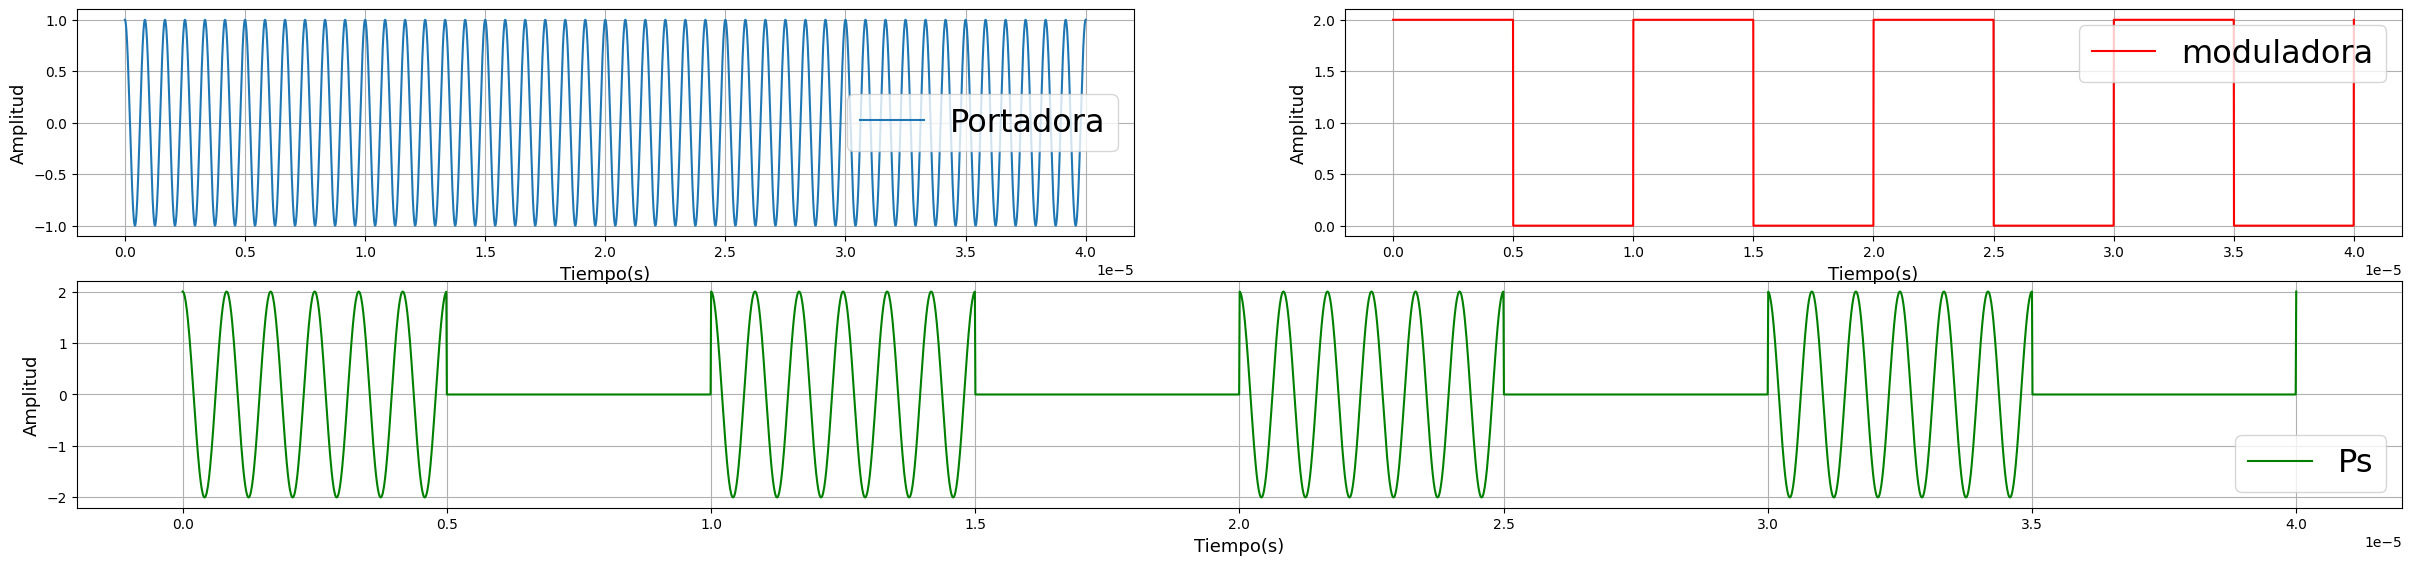

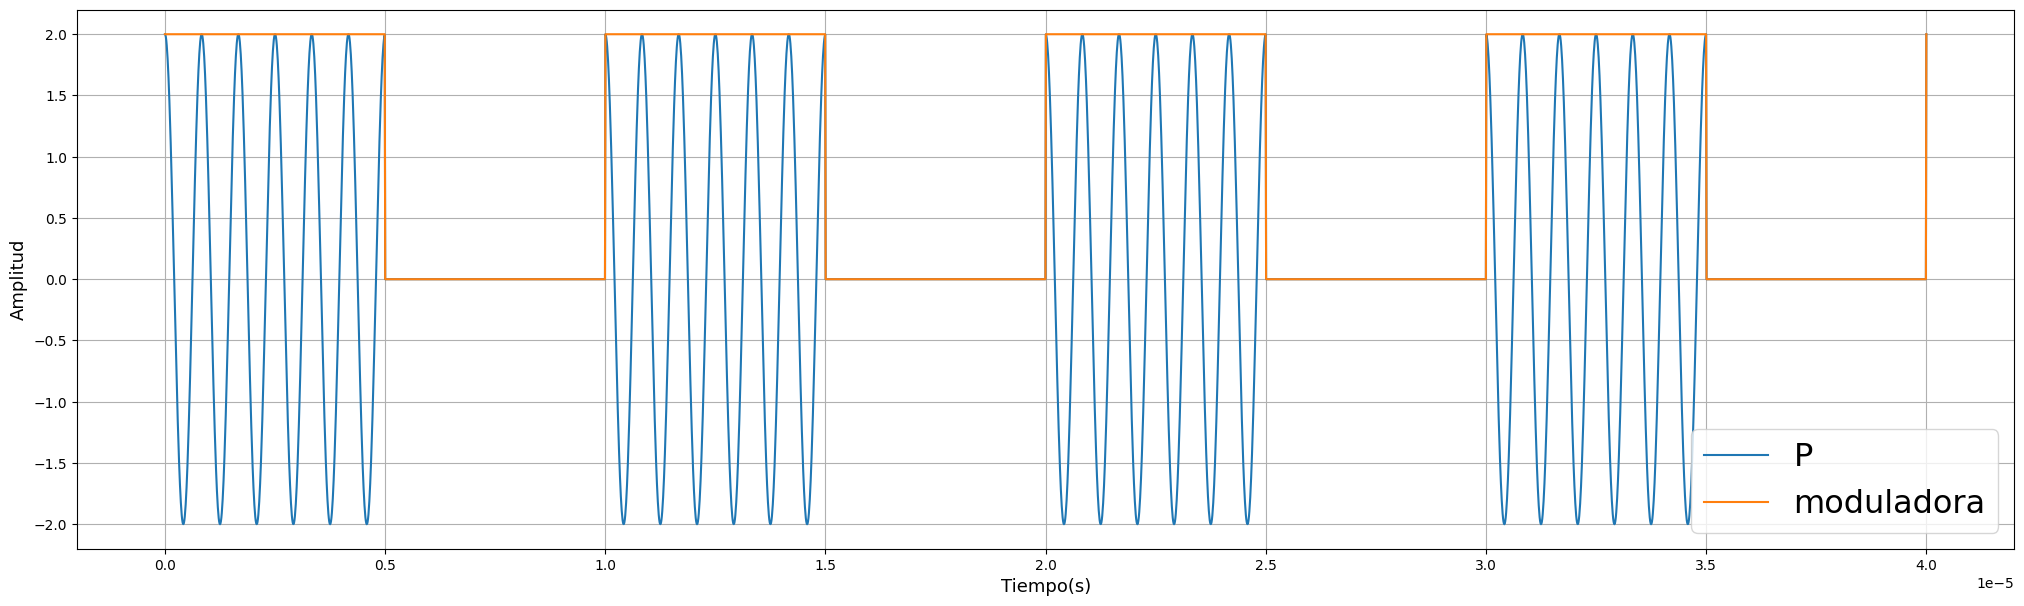

In [ ]:
#electronica
mod=mt_electro
t= t_electro
fp=1.2e6 #frecuencia de la portadora
Ps='Ps'
# portadora

wp=2*np.pi*fp
por_electro=np.cos(wp*t)
# Modulada suprimida
modSup_electro=mod*por_electro
graficas3(t,mod,por_electro,modSup_electro,0,Ps)

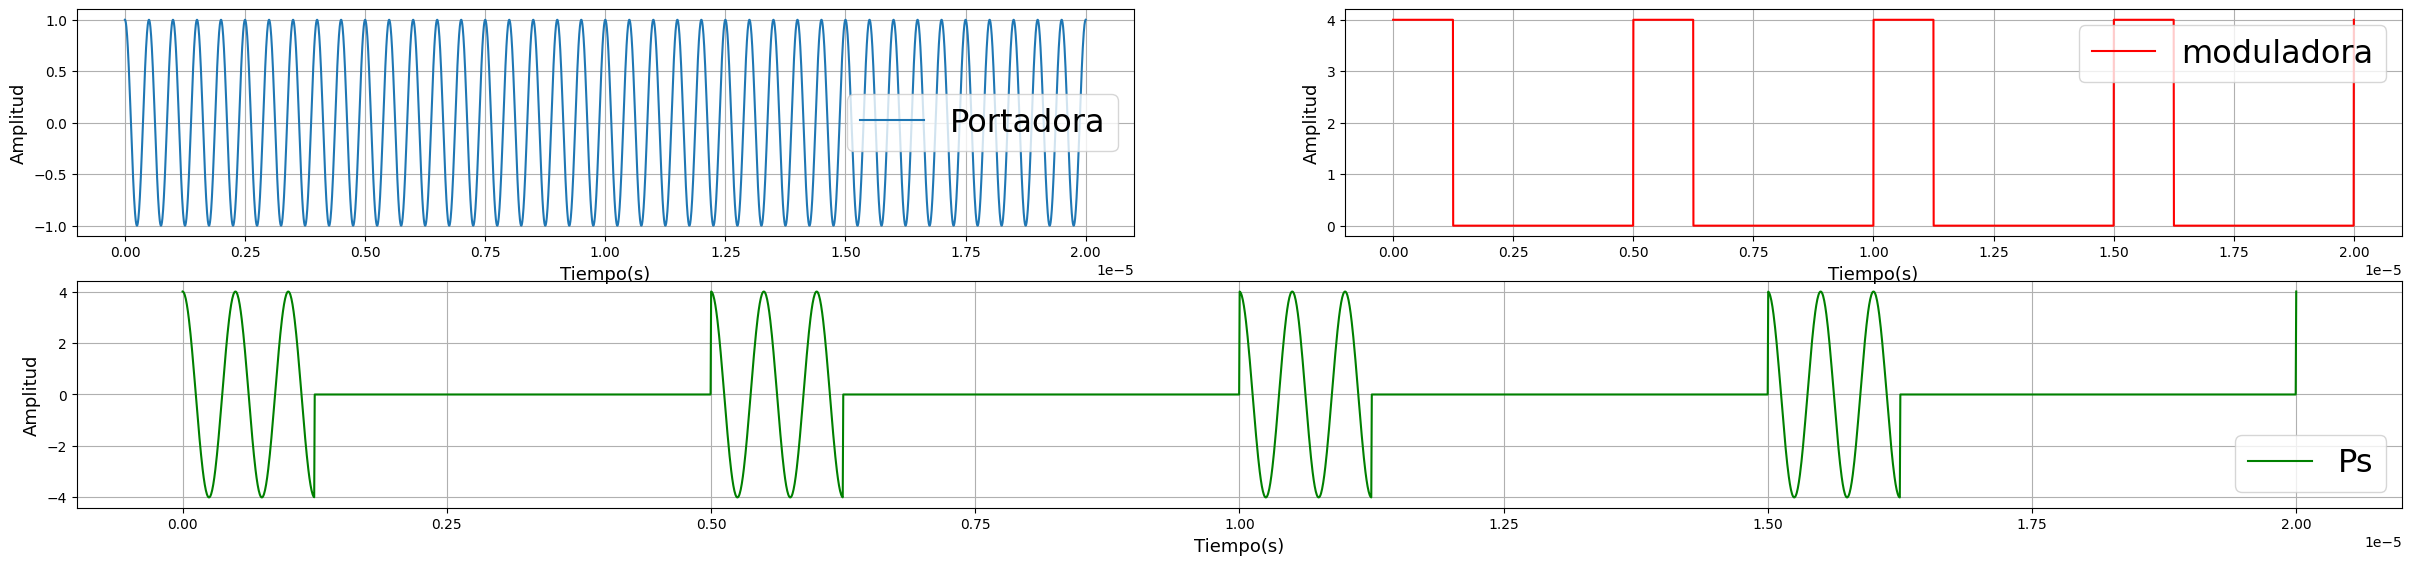

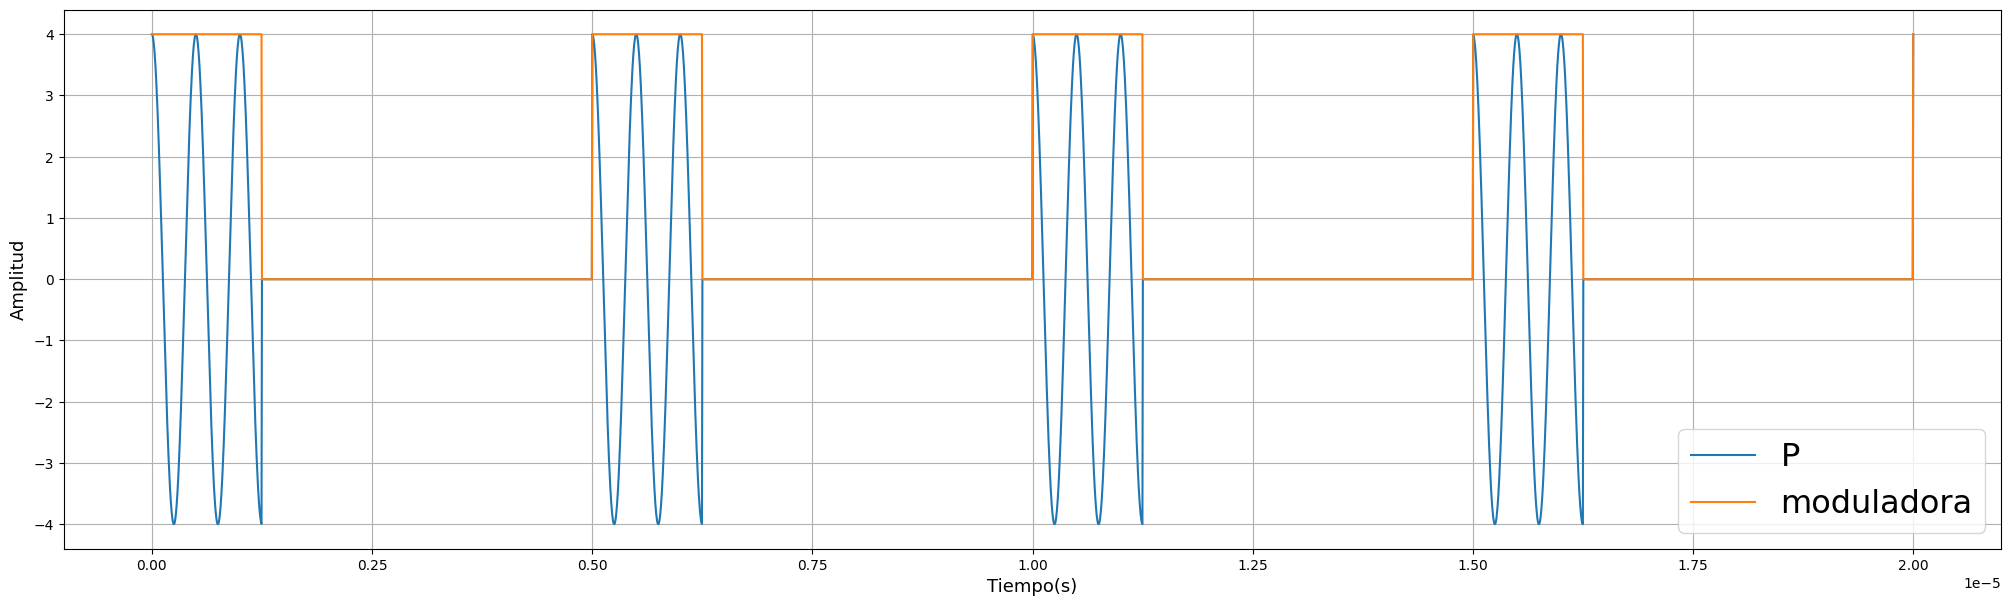

In [ ]:
#teleco
mod=mt_teleco
t= t_teleco
fp=2e6
Ps='Ps'
# portadora

wp=2*np.pi*fp
por=np.cos(wp*t)
# Modulada suprimida
modSup_teleco=mod*por
graficas3(t,mod,por,modSup_teleco,0,Ps)

In [ ]:
#teleco
mod=mt_bio
t= t_bio
fp=2.8e6
Ps='Ps'
# portadora

wp=2*np.pi*fp
por_bio=np.cos(wp*t)
# Modulada suprimida
modSup_bio=mod*por_bio
graficas3(t,mod,por_bio,modSup_bio,0,Ps)

#3.3  Comportamiento espectral

In [ ]:
#electronica

#Señal Moduladora
w=np.pi*fm_electro
fourier(mt_electro,w,t,1,"Moduladora",0)
#Señal Portadora
fourier(por_electro,wp_electro,t,1,"Portadora",0)
#Señal Portadora suprimida
fourier(modSup_electro,wp_electro,t,1,"Portadora Suprimida",0)
#Gran portadora
fourier(modulGP_electro,wp_electro,t,1,"Gran Portadora",0)

In [ ]:
#Teleco
#Señal Moduladora
w=2*np.pi*fm_teleco
t= t_teleco
f=2.0e6
wp_teleco=2*np.pi*f
fourier(mt_teleco,w,t,1,"Moduladora",0)
#Señal Portadora
fourier(por_teleco,wp_teleco,t,1,"Portadora",0)
#Señal Portadora suprimida
fourier(modSup_teleco,wp_teleco,t,1,"Portadora Suprimida",0)
#Gran portadora
fourier(modulGP_teleco,wp_teleco,t,1,"Gran Portadora",0)


In [ ]:
#bio
w=2*np.pi*fm_bio
t= t_bio
f=2.8e6
wp_bio=2*np.pi*f
fourier(mt_bio,w,t,1,"Moduladora",0)
#Señal Portadora
fourier(por_bio,wp_bio,t,1,"Portadora",0)
#Señal Portadora suprimida
fourier(modSup_bio,wp_bio,t,1,"Portadora Suprimida",0)
#Gran portadora
fourier(modulGP_bio,wp_bio,t,1,"Gran Portadora",0)

#3.4 Ancho de banda


In [ ]:

plt.figure(figsize = (40,20))
plt.subplot(2,2,1)
plt.grid()
fp_electro=1.2e6
fp_teleco=2e6
fp_bio=2.8e6

adm_espectro(1,modSup_electro,fm_electro,t_electro,fp_electro)
adm_espectro(3,modSup_teleco,fm_teleco,t_teleco,fp_teleco)
adm_espectro(5,modSup_bio,fm_bio,t_bio,fp_bio)
plt.ylabel("Amplitud")
plt.title("Espectro Señal Moduladora Portadora Suprimida")
plt.grid()
plt.tick_params(labelsize = 15)


#conclusion
 Los trabajos que aplican los conocimientos teóricos a problemas del mundo real son una excelente oportunidad de aprendizaje. Al enfrentarse a situaciones reales, se fortalecen los conceptos y se adquiere una comprensión más profunda de cómo se aplican en la práctica